In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sn
from ipywidgets import FileUpload

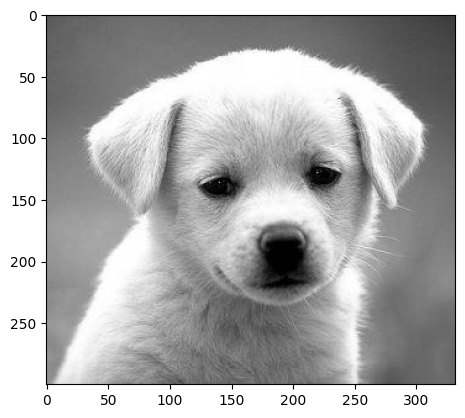

In [6]:
file_path = input("Enter path to image: ")
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found or unable to load.")
plt.imshow(img, cmap='gray')

In [9]:
M, N = img.shape
x = np.arange(M)
y = np.arange(N)
u = x.reshape((M, 1))
v = y.reshape((N, 1))

W_N = np.exp(-2j * np.pi * np.outer(y, y) / N)
W_M = np.exp(-2j * np.pi * np.outer(x, x) / M)
dft_result = W_M @ img @ W_N

print(dft_result.shape)

(300, 332)


In [10]:
magnitudes = np.zeros((M, N), dtype=float)
for x in range(M):
    for y in range(N):
        magnitudes[x][y] = math.sqrt((dft_result[x][y].real**2)+(dft_result[x][y].imag**2))
        magnitudes[x][y] = math.log1p(magnitudes[x][y])
norm_dft = magnitudes/np.max(magnitudes)*255
magnitudes = np.uint8(norm_dft)

In [11]:
dft_cv = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
cv_results = np.zeros((M, N), dtype=float)
for x in range(M):
    for y in range(N):
        cv_results[x][y] = math.sqrt((dft_cv[x, y, 0]**2)+(dft_cv[x, y, 1]**2))
        cv_results[x][y] = math.log1p(cv_results[x][y])
norm_dft = cv_results/np.max(cv_results)*255
cv_results = np.uint8(norm_dft)

In [12]:
map = np.zeros((2,2), dtype=int)

for i in range(M):
    for j in range(N):
        if magnitudes[i][j] == cv_results[i][j]:
            if magnitudes[i][j] > 128:
                map[0,0] += 1
            else:
                map[0,1] += 1
        else:
            if magnitudes[i][j] > cv_results[i][j]:
                if magnitudes[i][j] > 128:
                    map[1,0] += 1
                else:
                    map[1,1] += 1

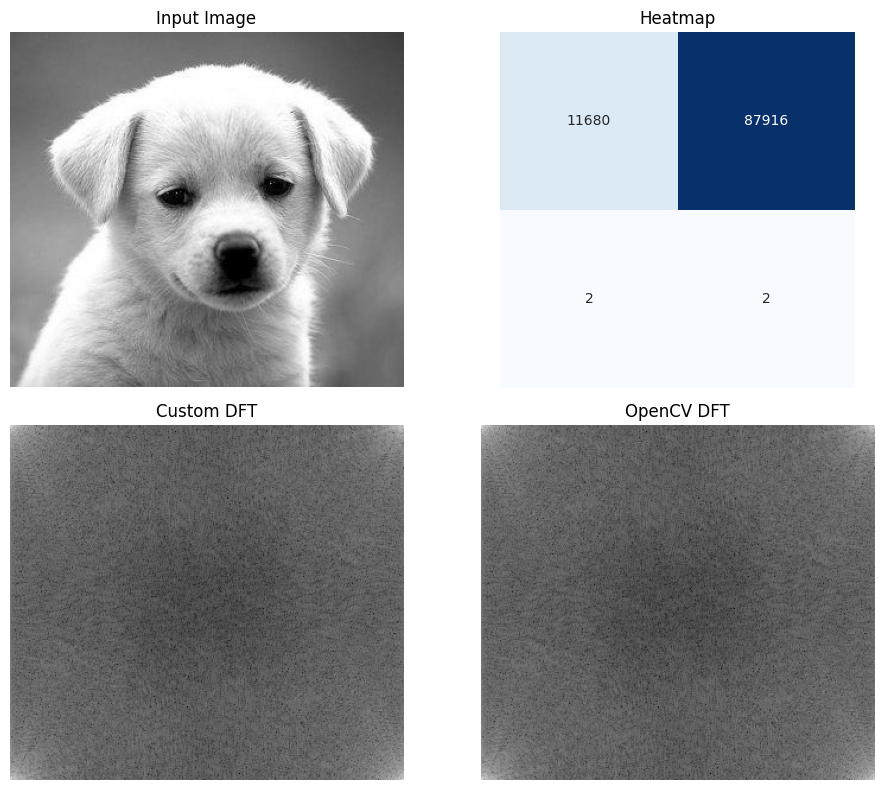

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Input Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(map, cmap='hot')
sn.heatmap(map, ax= axes[0, 1], cmap ='Blues', annot=True, fmt='d', cbar=False)
axes[0, 1].set_title("Heatmap")
axes[0, 1].axis("off")

axes[1, 0].imshow(magnitudes, cmap='gray')
axes[1, 0].set_title("Custom DFT")
axes[1, 0].axis("off")

axes[1, 1].imshow(cv_results, cmap='gray')
axes[1, 1].set_title("OpenCV DFT")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

In [16]:
cv.imwrite(input("Enter path to destination: "), magnitudes)

True